In [1]:
import numpy as np
import pandas as pd

## Originale Daten

In [47]:
path = '/Users/svpovol/Desktop/SoSe22/DBS/Projekt/Literature-data_TU-Darmstadt.txt'
data_org = pd.read_csv(path, delimiter = "	", header = 1)
col = data_org.columns.values.tolist()

In [53]:
#select
data = data_org[['Quelle', 'Autor', 'Titel', 'Jahr', 'Journal', 'Typ', 'DOI', 'Gelesen?', 'Empirisch?', 'Ausschlusspunkt', 'Ausschlussgrund', 'Kommentar', 'Feld', 'Thema', 'HMD', 'Interaction device', 'No Participants']]
#clean
data = data.dropna(how='all')
data.dropna(subset=['Jahr','Journal','Quelle','Autor', 'Titel'], inplace = True)
#transform
data['Jahr'] = data['Jahr'].astype(int)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1069 entries, 1 to 1069
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Quelle              1069 non-null   object 
 1   Autor               1069 non-null   object 
 2   Titel               1069 non-null   object 
 3   Jahr                1069 non-null   int64  
 4   Journal             1069 non-null   object 
 5   Typ                 325 non-null    object 
 6   DOI                 1038 non-null   object 
 7   Gelesen?            740 non-null    object 
 8   Empirisch?          953 non-null    object 
 9   Ausschlusspunkt     1069 non-null   object 
 10  Ausschlussgrund     958 non-null    object 
 11  Kommentar           174 non-null    object 
 12  Feld                907 non-null    object 
 13  Thema               906 non-null    object 
 14  HMD                 256 non-null    object 
 15  Interaction device  128 non-null    object 
 16  No Par

In [54]:
data.describe(include = "all")

,Quelle,Autor,Titel,Jahr,Journal,Typ,DOI,Gelesen?,Empirisch?,Ausschlusspunkt,Ausschlussgrund,Kommentar,Feld,Thema,HMD,Interaction device,No Participants
count,1069,1069,1069,1069.000000,1069,325,1038,740,953,1069,958,174,907,906,256,128,159.000000
unique,3,1028,1066,NaN,505,6,935,1,7,5,9,165,25,39,86,81,NaN
top,WOS,"Wang, Qiyue; Jiao, Wenhua; Yu, Rui; Johnson, M...",The New Dawn of Virtual Reality in Health Care...,NaN,IEEE TRANSACTIONS ON VISUALIZATION AND COMPUTE...,Article,0,Görge,Ja,Abstract,kein Bezug zu manueller Kommissionierung,interessant: Abschätzung von Distanzen,Hardwareentwicklung und Evaluation,Visual perception,Oculus Rift,None,NaN
freq,934,3,2,NaN,50,281,29,740,556,738,333,5,181,89,72,20,NaN
mean,NaN,NaN,NaN,2015.289055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.490566
std,NaN,NaN,NaN,5.961619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.534310
min,NaN,NaN,NaN,1993.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
25%,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000
50%,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.000000
75%,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.500000


## Externe Daten

In [156]:
path = '/Users/svpovol/Desktop/SoSe22/DBS/Projekt/data/737-source-results.xlsx'
ex_data = pd.read_excel(path)

In [157]:
ex_data.describe(include = 'all')

,Source title,CiteScore,Highest percentile,2018-21 Citations,2018-21 Documents,% Cited,SNIP,SJR,Publisher
count,737,595.000000,595,595.000000,595.000000,595.000000,584.000000,565.000000,717
unique,737,NaN,595,NaN,NaN,NaN,NaN,NaN,223
top,International Journal of Imaging Systems and T...,NaN,11.0%\n81/91\nComputer Graphics and Computer-A...,NaN,NaN,NaN,NaN,NaN,Springer Nature
freq,1,NaN,1,NaN,NaN,NaN,NaN,NaN,119
mean,NaN,4.600672,NaN,2814.583193,470.563025,61.556303,1.327202,0.885065,NaN
std,NaN,5.340352,NaN,13152.888425,2172.946509,21.568186,1.431107,1.530138,NaN
min,NaN,0.000000,NaN,0.000000,5.000000,0.000000,0.000000,0.100000,NaN
25%,NaN,1.400000,NaN,140.000000,82.000000,47.000000,0.553750,0.251000,NaN
50%,NaN,3.200000,NaN,495.000000,147.000000,66.000000,0.995000,0.493000,NaN
75%,NaN,6.100000,NaN,1517.000000,322.000000,79.000000,1.621000,0.995000,NaN


## Zusammenfügen

In [158]:
#Prüfen ob Journals in beiden Datensätzen vorkommen
col1 = data['Journal'].apply(str.upper)
col2 = ex_data['Source title'].apply(str.upper)
liste = col2.unique().tolist()

for i in range(len(data)):
    if col1.iloc[i] in liste:
        print('found! ', col1.iloc[i])

found!  IEEE CONSUMER ELECTRONICS MAGAZINE
found!  VIRTUAL REALITY
found!  INTERNATIONAL JOURNAL OF HUMAN-COMPUTER INTERACTION
found!  IEEE INTERNET OF THINGS JOURNAL
found!  LIBRARY HI TECH
found!  DISPLAYS
found!  VIRTUAL REALITY
found!  VIRTUAL REALITY
found!  VIRTUAL REALITY
found!  EVOLUTIONARY INTELLIGENCE
found!  VIRTUAL REALITY
found!  COMPUTER ANIMATION AND VIRTUAL WORLDS
found!  INTERACTING WITH COMPUTERS
found!  VIRTUAL REALITY
found!  JOURNAL OF COMPUTING AND INFORMATION SCIENCE IN ENGINEERING
found!  INTERNATIONAL JOURNAL OF HUMAN-COMPUTER INTERACTION
found!  ENTERTAINMENT COMPUTING
found!  DIGITAL INVESTIGATION
found!  IEEE ROBOTICS AND AUTOMATION LETTERS
found!  DISPLAYS
found!  DISPLAYS
found!  IEEE COMPUTER GRAPHICS AND APPLICATIONS
found!  INTERNATIONAL JOURNAL OF COMPUTER ASSISTED RADIOLOGY AND SURGERY
found!  VIRTUAL REALITY
found!  VIRTUAL REALITY
found!  COMPUTER ANIMATION AND VIRTUAL WORLDS
found!  INFORMATION
found!  IEEE TRANSACTIONS ON VISUALIZATION AND COMPUT

In [159]:
data['Journal'] = data['Journal'].apply(str.upper)
ex_data['Source title'] = ex_data['Source title'].apply(str.upper)
ex_data2 = ex_data.rename(columns={"Source title": "Journal"})

In [160]:
#database = data.join(ex_data2, lsuffix='_orig', rsuffix='_extern')
database = pd.merge(data,ex_data, left_on = 'Journal', right_on = 'Source title') 
# könnte auch left-JOIN sein (how = 'left') um alle orig Daten zu bekommen, 
# aber meiner Meinung nach ist es sinloss für die Projektidee

In [172]:
database

,Quelle,Autor,Titel,Jahr,Journal,Typ,DOI,Gelesen?,Empirisch?,Ausschlusspunkt,...,No Participants,Source title,CiteScore,Highest percentile,2018-21 Citations,2018-21 Documents,% Cited,SNIP,SJR,Publisher
0,WOS,"Rafique, Muhammad Usman; Cheung, Sen-ching S.",Tracking Attacks on Virtual Reality Systems,2020,IEEE CONSUMER ELECTRONICS MAGAZINE,NaN,10.1109/MCE.2019.2953741,Görge,Nein,Abstract,...,NaN,IEEE CONSUMER ELECTRONICS MAGAZINE,7.9,87.0%\n97/747\nComputer Science Applications,2883.0,363.0,75.0,1.555,1.441,IEEE
1,WOS,"Ito, Kenichiro; Nishimura, Hidekazu; Ogi, Tetsuro",Motorcycle Head-Up Display: Design of Presenti...,2019,IEEE CONSUMER ELECTRONICS MAGAZINE,NaN,10.1109/MCE.2019.2923934,Görge,Nein,Abstract,...,NaN,IEEE CONSUMER ELECTRONICS MAGAZINE,7.9,87.0%\n97/747\nComputer Science Applications,2883.0,363.0,75.0,1.555,1.441,IEEE
2,WOS,"Checa, David; Bustillo, Andres",Advantages and limits of virtual reality in le...,2020,VIRTUAL REALITY,NaN,10.1007/s10055-019-00389-7,Görge,Ja,Volltext,...,100.0,VIRTUAL REALITY,7.8,87.0%\n12/91\nComputer Graphics and Computer-A...,1574.0,202.0,76.0,2.633,1.009,Springer Nature
3,WOS,"Shu, Yu; Huang, Yen-Zhang; Chang, Shu-Hsuan; C...",Do virtual reality head-mounted displays make ...,2019,VIRTUAL REALITY,NaN,10.1007/s10055-018-0376-x,Görge,Ja,Abstract,...,NaN,VIRTUAL REALITY,7.8,87.0%\n12/91\nComputer Graphics and Computer-A...,1574.0,202.0,76.0,2.633,1.009,Springer Nature
4,WOS,"Cao, Shi; Nandakumar, Krithika; Babu, Raiju; T...",Game play in virtual reality driving simulatio...,2019,VIRTUAL REALITY,NaN,10.1007/s10055-019-00412-x,Görge,Ja,Abstract,...,NaN,VIRTUAL REALITY,7.8,87.0%\n12/91\nComputer Graphics and Computer-A...,1574.0,202.0,76.0,2.633,1.009,Springer Nature
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,WOS,"Yeh, TP; Vance, JM","Combining MSC/NASTRAN, sensitivity methods, an...",1997,FINITE ELEMENTS IN ANALYSIS AND DESIGN,Article,10.1016/S0168-874X(96)00078-9,NaN,Nein,Abstract,...,NaN,FINITE ELEMENTS IN ANALYSIS AND DESIGN,5.6,97.0%\n5/176\nAnalysis,1327.0,236.0,80.0,1.124,0.836,Elsevier
229,WOS,"Helsel, S",High-res VR displays,1997,COMPUTER GRAPHICS WORLD,Article,NaN,NaN,NaN,Titel,...,NaN,COMPUTER GRAPHICS WORLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PennWell Publishing Co.
230,WOS,"TAN, WC; MENG, THY",A LOW-POWER HIGH-PERFORMANCE POLYGON RENDERER ...,1995,JOURNAL OF VLSI SIGNAL PROCESSING,Article,10.1007/BF02407087,NaN,Nein,Titel,...,NaN,JOURNAL OF VLSI SIGNAL PROCESSING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Springer Nature
231,WOS,"SHAW, C; GREEN, M; LIANG, JD; SUN, YQ",DECOUPLED SIMULATION IN VIRTUAL-REALITY WITH T...,1993,ACM TRANSACTIONS ON INFORMATION SYSTEMS,Article,10.1145/159161.173948,NaN,Nein,Abstract,...,NaN,ACM TRANSACTIONS ON INFORMATION SYSTEMS,9.6,"96.0%\n9/216\nGeneral Business, Management and...",1577.0,165.0,88.0,2.707,1.585,ACM


## Visualization

In [162]:
# Interessant ist zu sehen, Journals in Abhängigkeit von CiteScore

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

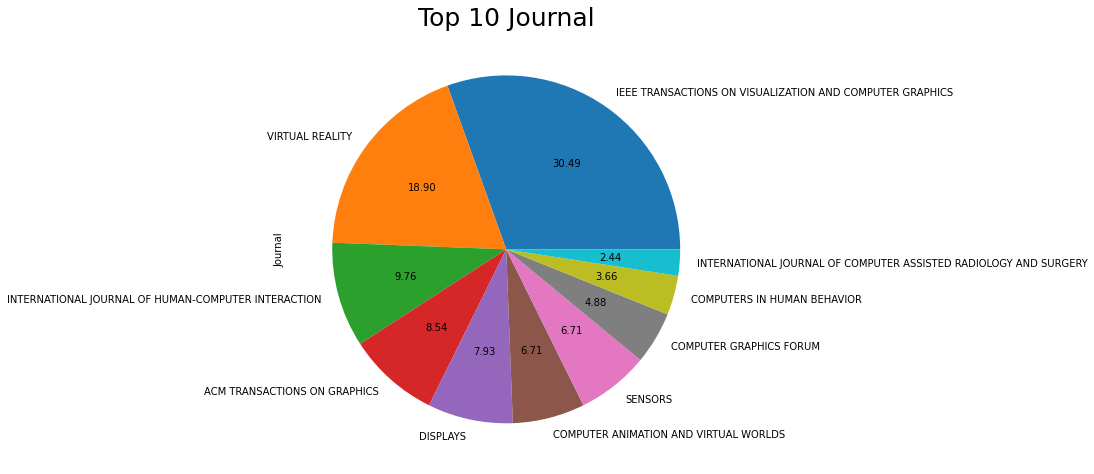

In [164]:
database["Journal"].value_counts().head(10).plot(kind = 'pie',autopct='%.2f',figsize=(8,8))
_=plt.title('Top 10 Journal', fontsize=25)

In [165]:
database.groupby(['CiteScore', 'Journal']).count()

Quelle  Autor  \
CiteScore Journal                                                             
1.4       DESIGN JOURNAL                                           1      1   
1.5       INTERNATIONAL JOURNAL OF SEMANTIC COMPUTING              1      1   
1.6       IEICE TRANSACTIONS ON INFORMATION AND SYSTEMS            2      2   
          INTERNATIONAL JOURNAL OF SERIOUS GAMES                   1      1   
1.8       INFORMATION TECHNOLOGY AND LIBRARIES                     1      1   
2.0       KSII TRANSACTIONS ON INTERNET AND INFORMATION S...       1      1   
2.1       INTERNATIONAL JOURNAL OF COMPUTER APPLICATIONS ...       1      1   
2.4       COMPUTER ANIMATION AND VIRTUAL WORLDS                   11     11   
2.6       IMAGING SCIENCE JOURNAL                                  1      1   
3.1       INTERACTING WITH COMPUTERS                               2      2   
3.2       AUSTRALASIAN JOURNAL OF INFORMATION SYSTEMS              1      1   
3.5       ADVANCED ROBOTICS                                        1      1   
3.7       COMPUTERS                                                2      2   
3.8       EVOLUTIONARY INTELLIGENCE                                1      1   
3.9       DISPLAYS                                                13     13   
          IEEE COMPUTER GRAPHICS AND APPLICATIONS                  3      3   
          LIBRARY HI TECH                                          1      1   
          MULTISENSORY RESEARCH                                    1      1   
4.0       IET IMAGE PROCESSING                                     3      3   
          JOURNAL ON MULTIMODAL USER INTERFACES                    1      1   
          VISUAL COMPUTER                                          2      2   
4.2       JOURNAL OF COMPUTING AND INFORMATION SCIENCE IN...       2      2   
          JOURNAL OF REAL-TIME IMAGE PROCESSING                    2      2   
4.3       ACM TRANSACTIONS ON ACCESSIBLE COMPUTING                 1      1   
4.5       ENTERTAINMENT COMPUTING                                  3      3   
4.8       JOURNAL OF SUPERCOMPUTING                                1      1   
5.2       IEEE TRANSACTIONS ON HAPTICS                             2      2   
5.4       COMPUTER GRAPHICS FORUM                                  8      8   
5.6       FINITE ELEMENTS IN ANALYSIS AND DESIGN                   1      1   
5.8       INTERNATIONAL JOURNAL OF COMPUTER ASSISTED RADI...       4      4   
6.1       JOURNAL OF VISUAL COMMUNICATION AND IMAGE REPRE...       2      2   
6.4       SENSORS                                                 11     11   
6.5       UNIVERSAL ACCESS IN THE INFORMATION SOCIETY              1      1   
7.3       INTERNATIONAL JOURNAL OF HUMAN-COMPUTER INTERAC...      16     16   
7.4       IEEE TRANSACTIONS ON HUMAN-MACHINE SYSTEMS               2      2   
7.8       VIRTUAL REALITY                                         31     31   
7.9       IEEE CONSUMER ELECTRONICS MAGAZINE                       2      2   
          JOURNAL OF THE ASSOCIATION FOR INFORMATION SYSTEMS       2      2   
8.0       IEEE ROBOTICS AND AUTOMATION LETTERS                     3      3   
8.6       IEEE SYSTEMS JOURNAL                                     1      1   
8.7       HUMAN-COMPUTER INTERACTION                               3      3   
          JOURNAL OF COMPUTATIONAL DESIGN AND ENGINEERING          1      1   
9.2       ACM TRANSACTIONS ON COMPUTER-HUMAN INTERACTION           1      1   
9.6       ACM TRANSACTIONS ON INFORMATION SYSTEMS                  1      1   
11.4      IEEE TRANSACTIONS ON VISUALIZATION AND COMPUTER...      50     50   
11.5      JOURNAL OF MEDICAL SYSTEMS                               2      2   
14.2      ACM TRANSACTIONS ON GRAPHICS                            14     14   
14.9      COMPUTERS IN HUMAN BEHAVIOR                              6      6   
17.1      IEEE INTERNET OF THINGS JOURNAL                          1      1   
28.8      INTERNATIONAL JOURNAL O

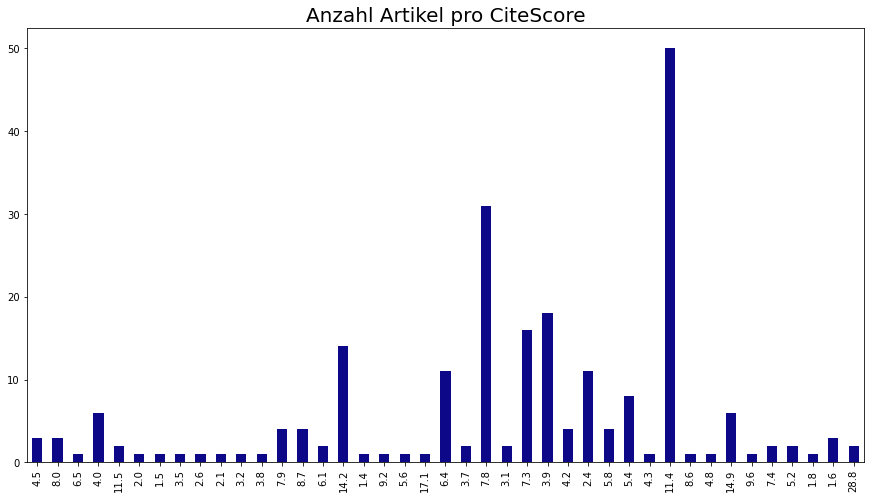

In [166]:
database['CiteScore'].value_counts(sort=False).plot(kind="bar",figsize=(15,8), cmap = 'plasma')
_=plt.title('Anzahl Artikel pro CiteScore', fontsize=20)

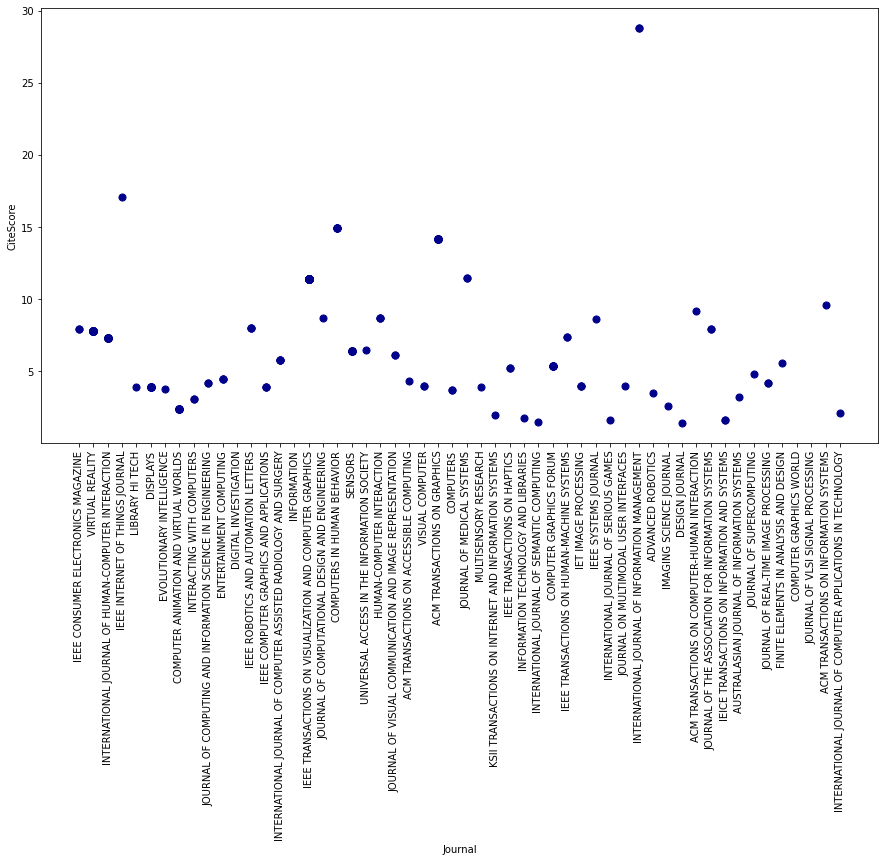

In [171]:
ax1 = database.plot.scatter(x='Journal',
                       y='CiteScore',
                      c='DarkBlue',figsize=(15,8), s = 50, rot=90)